In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle

In [16]:
df = pd.read_csv(r"dataset/data.csv", sep = "|")

In [24]:
def explore_data(df):
    print("Head")
    print(df.head())
    print("Tail")
    print(df.tail())
    print("Describe")
    print(df.describe())
    print("Info")
    print(df.info())

In [25]:
explore_data(df)

Head
           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568 

In [20]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [37]:
df["legitimate"].value_counts() > 2

legitimate
0    True
1    True
Name: count, dtype: bool

In [40]:
def categorical_and_numerical_data(df):
    cat = []
    num = []
    
    for col in df.columns:
        if df[col].nunique() <= 10:
            cat.append(col)
        if df[col].nunique() > 10:
            num.append(col)
    return cat, num         

In [41]:
#df = df.drop(columns=["Name", "md5"])
cat, num = categorical_and_numerical_data(df)    

In [54]:
cat

['Machine',
 'SizeOfOptionalHeader',
 'FileAlignment',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'Subsystem',
 'legitimate']

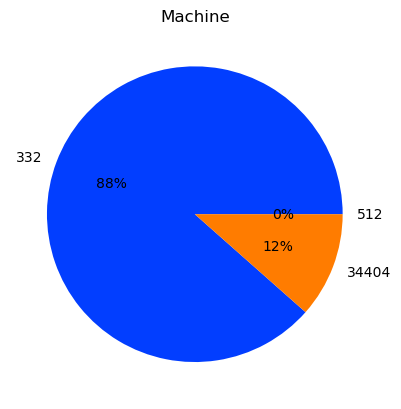

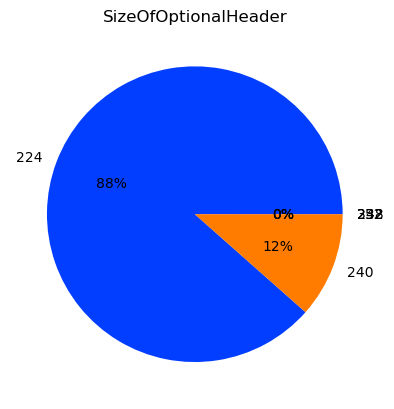

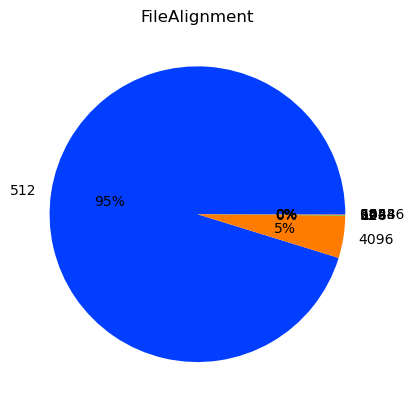

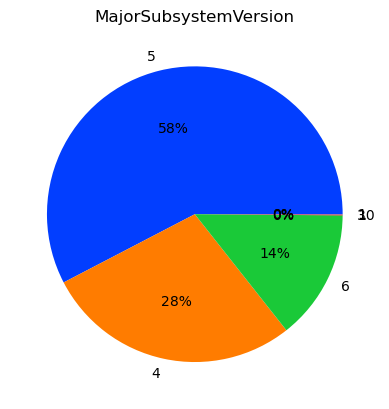

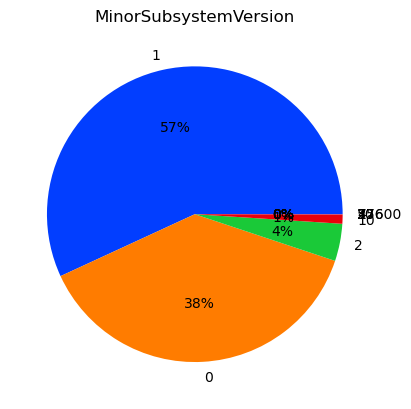

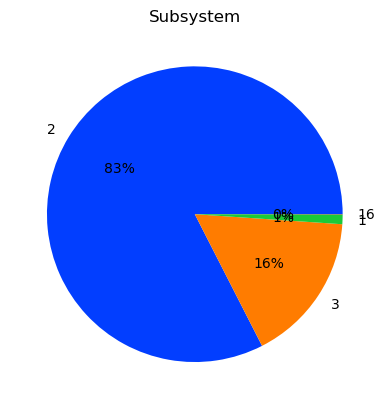

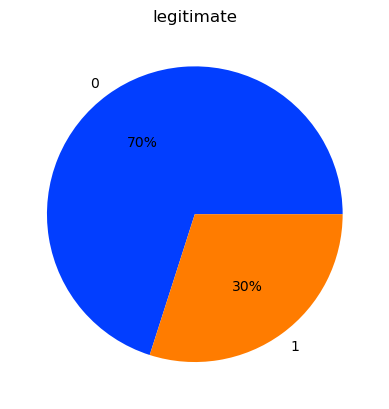

In [67]:
for cats in cat:
    palette_color = sns.color_palette('bright') 
    val = df[cats].value_counts()
    plt.pie(val, labels=val.index, colors=palette_color, autopct='%.0f%%')
    plt.title(cats)
    plt.show() 

In [72]:
X = df.drop(columns=["legitimate"])
y = df["legitimate"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [77]:

from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

(27610, 54)

In [84]:
models = {"XGBClassifier" : XGBClassifier(), "XGBRFClassifier" : XGBRFClassifier(), 
          "LGBMClassifier" : LGBMClassifier(),  
          "SVC": SVC(), "RandomForestClassifier" : RandomForestClassifier()}

for name, model in models.items():
    print(name)
    train = model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print("F1 Score")
    print(f1_score(y_test, prediction))
    print("Roc Auc Score")
    print(roc_auc_score(y_test, prediction))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, prediction))

XGBClassifier
F1 Score
0.9932525228399116
Roc Auc Score
0.99561004784689
Confusion Matrix
[[19180    70]
 [   43  8317]]
XGBRFClassifier
F1 Score
0.9833771824922268
Roc Auc Score
0.9881438824333563
Confusion Matrix
[[19109   141]
 [  137  8223]]
LGBMClassifier
F1 Score
0.9918805970149253
Roc Auc Score
0.9946742993848258
Confusion Matrix
[[19167    83]
 [   53  8307]]
SVC
F1 Score
0.0002392058366224136
Roc Auc Score
0.5000598086124401
Confusion Matrix
[[19250     0]
 [ 8359     1]]
RandomForestClassifier
F1 Score
0.9919350020909253
Roc Auc Score
0.9945311004784689
Confusion Matrix
[[19173    77]
 [   58  8302]]


In [87]:
#Best Model is : XGBClassifier
xgb_classifier = XGBClassifier().fit(X_train, y_train)

In [89]:
with open('malware_model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)